In [12]:
from IPython.display import Image
%cd clusters/
latex.extra_preamble('')
latex.add_to_preamble(r"\usepackage{tkz-graph,semtkzX}")
latex.add_to_mathjax_avoid_list("clusterpicture")
sage.misc.latex.EMBEDDED_MODE = True

[Errno 2] No such file or directory: 'clusters/'
/Users/donepudi/Desktop/GitHub/cluster-pictures/notebooks


# Cluster pictures & BY-trees in SageMath


## https://github.com/alexjbest/cluster-pictures

### implementation by Alex J. Best and Raymond van Bommel



In [11]:
from sage_cluster_pictures.cluster_pictures import *
K = Qp(5)
x = polygen(K)
H = HyperellipticCurve((x^2 + 5^2)*(x^2 - 5^15)*(x - 5^6)*(x - 5^6 - 5^9))
R = Cluster.from_curve(H)
view(R)

PrecisionError: p-adic factorization not well-defined since the discriminant is zero up to the requestion p-adic precision

## Creating clusters

From roots:

In [8]:
view(Cluster.from_roots([K(1), K(2), K(5), K(10), K(25), K(50)]))

Error: PDFLaTeX does not seem to be installed.  Download it from
ctan.org and try again.
Latex error
<html><img src="cell:///Users/donepudi/.sage/temp/ravis-mbp.lan/61951/tmp_kjgqsp81.png"></html>


From valuations: $$y^2 = (x-1)(x-2)(x-3)(x-p^{2})(x-p^{7})(x+p^{7})$$

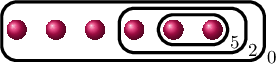

In [4]:
view(Cluster([[oo, 0,  0,  0,  0,  0],
              [0,  oo, 0,  0,  0,  0],
              [0,  0,  oo, 0,  0,  0],
              [0,  0,  0 , oo, 2,  2],
              [0,  0,  0,  2,  oo, 7],
              [0,  0,  0,  2,  7,  oo]]))

### Basic properties

In [5]:
print(R.children())

[Cluster with 4 roots and 2 children, Cluster with 1 roots and 0 children, Cluster with 1 roots and 0 children]


In [6]:
[unicode_art(D) for D in R.all_descendents()]

['(((● ●)_3/2 (● ●)_3)_5 ● ●)_1',
 '((● ●)_3/2 (● ●)_3)_5',
 '(● ●)_3/2',
 '●',
 '●',
 '(● ●)_3',
 '●',
 '●',
 '●',
 '●']

In [7]:
R.is_semistable(K)

True

In [4]:
(R.jacobian_has_potentially_good_reduction(), R.potential_toric_rank())

(False, 2)

## BY-trees:

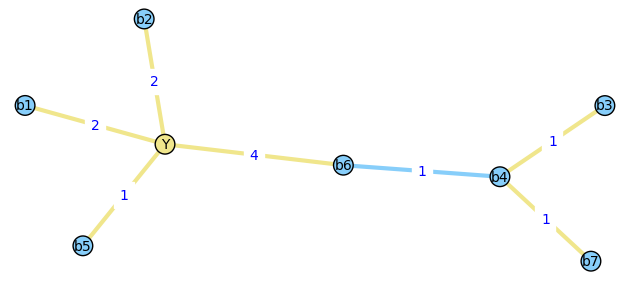

In [9]:
T = BYTree(name="Stick person")
T.add_blue_vertices(['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7'])
T.add_yellow_vertex('Y')
T.add_yellow_edges([('b1', 'Y', 2), ('b2', 'Y', 2), ('b5', 'Y', 1), ('b6', 'Y', 4), ('b3', 'b4', 1), ('b7', 'b4', 1)])
T.add_blue_edge(('b6', 'b4', 1))
plot(T,vertex_labels=True)

In [10]:
T.validate()

True

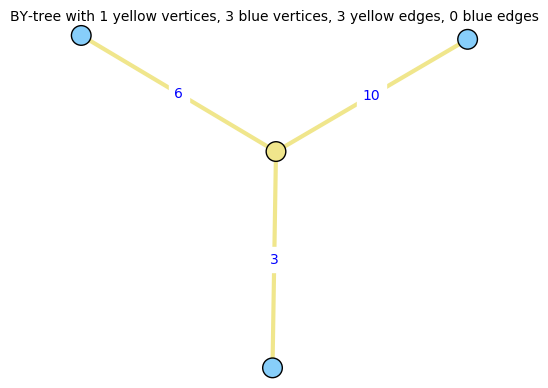

In [11]:
T = R.BY_tree(); T

In [12]:
T.vertices()

[Cluster with 6 roots and 3 children,
 Cluster with 4 roots and 2 children,
 Cluster with 2 roots and 2 children,
 Cluster with 2 roots and 2 children]

Via the cluster picture and the homology of the dual graph of the special fibre:

In [13]:
R.root_number()

1

Via the associated BY-tree:

In [14]:
R.tamagawa_number()

108

In [15]:
T, F = R.BY_tree(with_frob=True)
T.tamagawa_number(F)

108

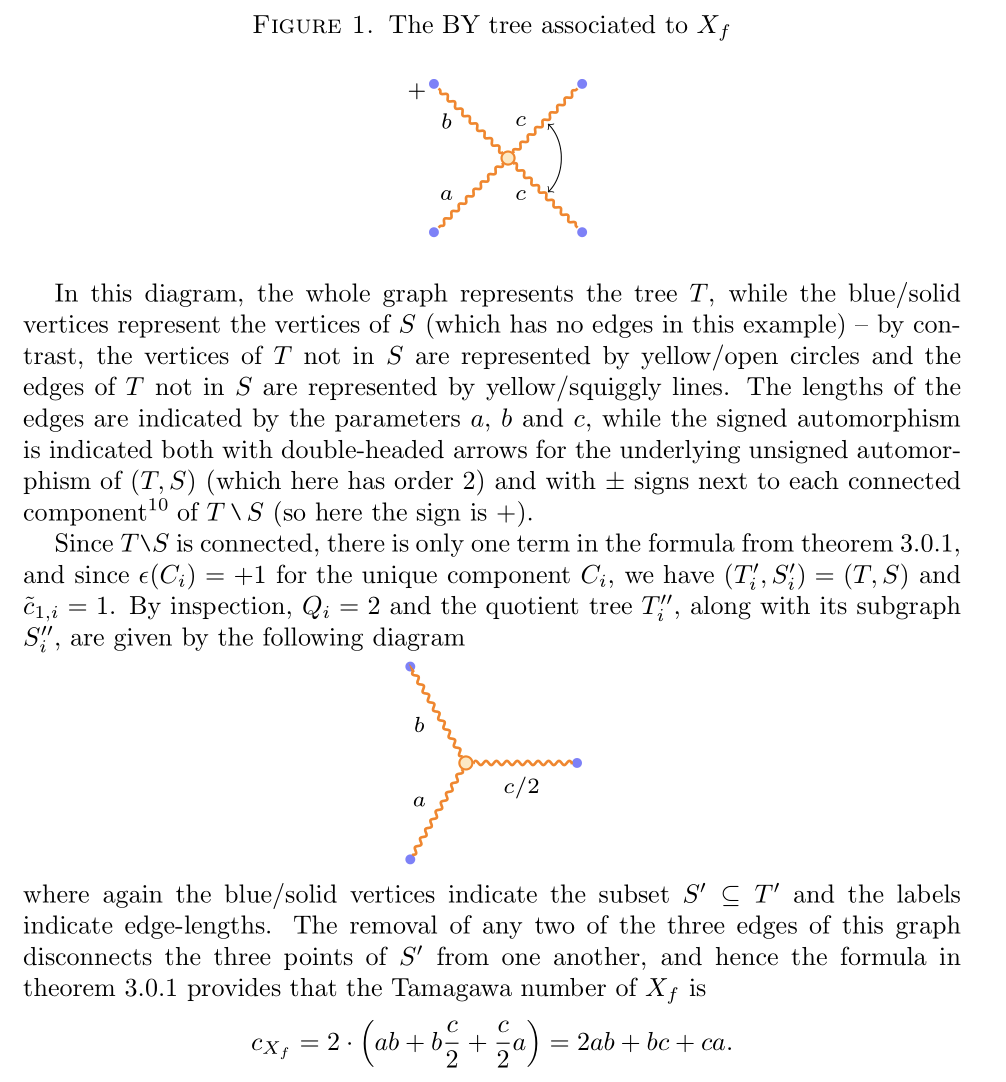

In [21]:
Image(filename = "img/betts.png", width=int(600))

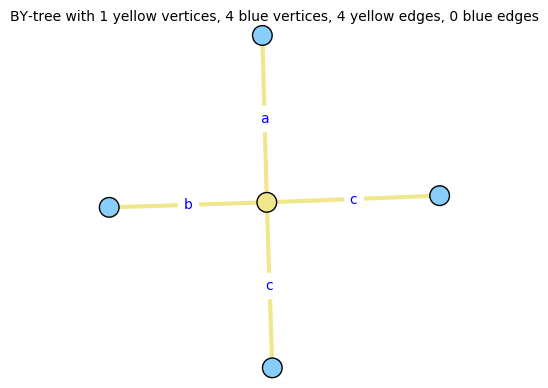

In [44]:
a, b, c = var('a b c', domain="positive")
R = Cluster([[oo, a/2, 0,  0,  0,  0,   0,  0],
             [a/2, oo, 0,  0,  0,  0,   0,  0],
             [0,  0,  oo, b/2, 0,  0,   0,  0],
             [0,  0,  b/2, oo, 0,  0,   0,  0],
             [0,  0,  0,  0,  oo, c/2,  0,  0],
             [0,  0,  0,  0,  c/2, oo,  0,  0],
             [0,  0,  0,  0,  0,  0,  oo, c/2],
             [0,  0,  0,  0,  0,  0,  c/2, oo], ])
A,B,C1,C2 = R.children()
T = R.BY_tree(); T

In [45]:
%display plain

In [46]:
T.yellow_vertices()

[Cluster with 8 roots and 4 children]

In [47]:
%display latex

In [48]:
F = BYTreeIsomorphism(T, T,
                      lambda x: {A:A, B:B, C1:C2, C2:C1, R:R}[x],
                      lambda Y: 1)
T.tamagawa_number(F)

2*a*b + a*c + b*c

# Thank you! And thanks to the organisers!